<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/8_pytorch_rfbnet/Infer%20using%20pretrained%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/8_pytorch_rfbnet/installation
     
 - Select the right requirements file and run
 
     - chmod +x install.sh
     
     - ./install.sh

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/8_pytorch_rfbnet/installation && chmod +x install_colab.sh && ./install_colab.sh
# Restart colab runtime now

# For Local systems and cloud select the right CUDA version
# ! cd Monk_Object_Detection/8_pytorch_rfbnet/installation && chmod +x install.sh && ./install.sh

# About the network

1. Paper on RBFNet: https://arxiv.org/abs/1711.07767

2. Blog 1 on Receptive field: http://blog.christianperone.com/2017/11/the-effective-receptive-field-on-cnns/

3. Blog 2 on Receptive field: http://www.cs.toronto.edu/~wenjie/papers/nips16/top.pdf

# Inference 

In [1]:
import os
import sys
from IPython.display import Image
sys.path.append("Monk_Object_Detection/8_pytorch_rfbnet/lib/");

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
#Available model names
#model_name="e_vgg"; #input size - 512
#model_name="mobilenet"; #input size - 300

In [5]:
# Based on the model selected uncomment the related line
# Run it again is models are not downloaded properly

# e_vgg
#! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pHDc6Xg9im3affOr7xaimXaRNOHtbaPM' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1pHDc6Xg9im3affOr7xaimXaRNOHtbaPM" -O RFB512_E_34_4.pth && rm -rf /tmp/cookies.txt

# mobilenet
#! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vmbTWWgeMN_qKVWOeDfl1EN9c7yHPmOe' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vmbTWWgeMN_qKVWOeDfl1EN9c7yHPmOe" -O RFB_mobile_20_7.pth && rm -rf /tmp/cookies.txt

In [6]:
gtf.Pretrained_Model(model_name="e_vgg", use_gpu=True)

In [7]:
gtf.Setup();

Finished loading model!


/home/abhi/.virtualenvs/monk_obj_8_pytorch_rfbnet/lib/python3.6/site-packages/torch/nn/functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


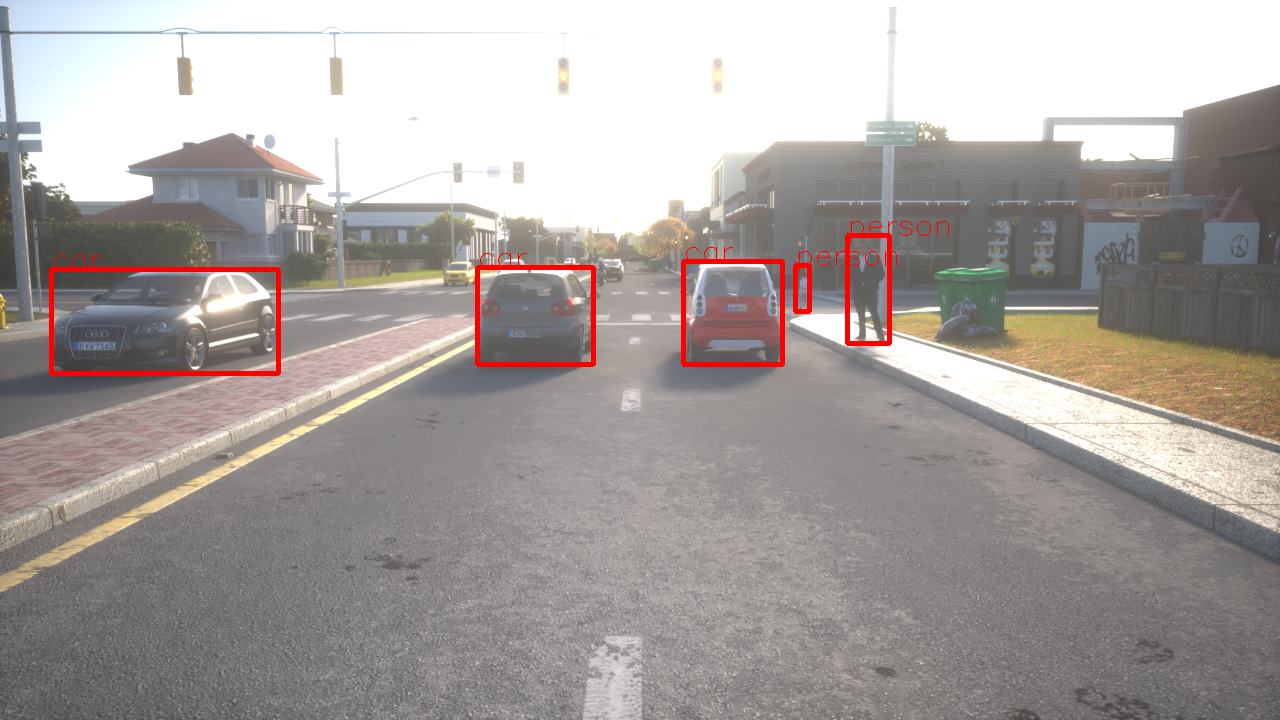

In [8]:
img_path = "test.png";
scores, bboxes, labels = gtf.Predict_On_Image(img_path, thresh=0.3, font_size=1, line_size=3, output_img_path="output.png");
Image(filename='output.png') 

In [9]:
folder_path = "test_folder";
output = gtf.Predict_On_Folder(folder_path, thresh=0.3, font_size=1, line_size=3, output_folder_path="output_folder");

100%|██████████| 4/4 [00:00<00:00,  6.28it/s]

Outputs stored at folder - output_folder


# Download Sample Validation Dataset
 - Credits: https://pjreddie.com/projects/pascal-voc-dataset-mirror/

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1QvVDAKiuaDIkk8gcSQfFn6eok3pT08zF' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1QvVDAKiuaDIkk8gcSQfFn6eok3pT08zF" -O pascal_voc_sample.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq pascal_voc_sample.zip

In [10]:
image_folder = "val/images";
gt_folder = "val/gt";

mAP, ap_dictionary, lamr_dictionary = gtf.Evaluate_On_Folder(image_folder, gt_folder, 
                                                                output_folder_path='eval_result', 
                                                                thresh=0.3, 
                                                                iou_thresh=0.5,
                                                                font_size=1, line_size=3);

100%|██████████| 112/112 [00:00<00:00, 2404.10it/s]


Outputs stored at folder - eval_result
0.00% = aeroplane AP 
77.78% = bicycle AP 
45.71% = bird AP 
27.50% = boat AP 
22.50% = bottle AP 
71.43% = bus AP 
53.38% = car AP 
72.73% = cat AP 
23.45% = chair AP 
50.00% = cow AP 
0.00% = diningtable AP 
89.58% = dog AP 
87.50% = horse AP 
0.00% = motorbike AP 
60.58% = person AP 
0.00% = pottedplant AP 
25.00% = sheep AP 
0.00% = sofa AP 
66.67% = train AP 
0.00% = tvmonitor AP 
mAP = 38.69%
